Here we will attempt to answer your questions as best we can with the limited time available to do so.

In the future, should you desire this type of in-depth analysis, you will find that the quality of your answers is directly proportional to the amount of heads-up you give your analysts. 

---

In [4]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [5]:
df=wrangle.wrangle()

Reading data from SQL server....
(This usually takes a while...)
Data read.
Adding number of programs completed...
Converting datatypes and reindexing on datetime....
Adding columns for days after graduation and program name.
Data is acquired, prepared, and wrangling complete.


---

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?


In [8]:
temp = df.copy()
temp['drop_me'] = temp.endpoint.str.contains('.jpg|.svg|.json|.jpeg', regex=True) | temp.endpoint.str.endswith('/')
temp = temp[temp.drop_me == False]

In [9]:
programs = ['java_web_dev', 'data_science']#, 'php_web_dev', 'front_end_web_dev']
for x in programs:
    print(f'The top ten endoints for {x} are {temp[temp.program == x].endpoint.value_counts().head(10)}')

The top ten endoints for java_web_dev are /                           35814
javascript-i                17457
toc                         17428
search/search_index.json    15212
java-iii                    12683
html-css                    12569
java-ii                     11719
spring                      11376
jquery                      10693
mysql                       10318
Name: endpoint, dtype: int64
The top ten endoints for data_science are /                                           8358
search/search_index.json                    2203
classification/overview                     1785
1-fundamentals/modern-data-scientist.jpg    1655
1-fundamentals/AI-ML-DL-timeline.jpg        1651
1-fundamentals/1.1-intro-to-data-science    1633
classification/scale_features_or_not.svg    1590
fundamentals/AI-ML-DL-timeline.jpg          1443
fundamentals/modern-data-scientist.jpg      1438
sql/mysql-overview                          1424
Name: endpoint, dtype: int64


---

2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?


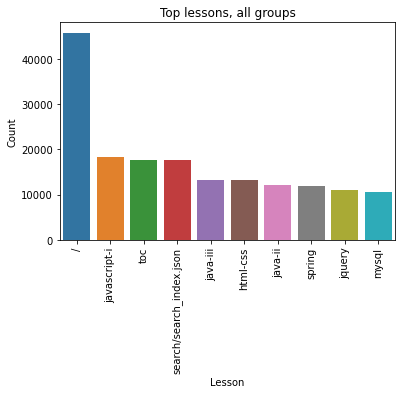

In [12]:
# Top 5 lessons for all Groups
top_lessons = pd.DataFrame(temp.endpoint.value_counts().head(10))
plt.figure(figsize=(6, 4))
sns.barplot(data=top_lessons,
y="endpoint", x=top_lessons.index)
plt.title('Top lessons, all groups')
plt.xlabel('Lesson')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [16]:
ds_df = temp[temp.program == 'data_science']
ds_graph_set = ds_df[ds_df.endpoint.isin(['classification/overview', '1-fundamentals/1.1-intro-to-data-science',
       'sql/mysql-overview', 'fundamentals/intro-to-data-science',
       '6-regression/1-overview', 'anomaly-detection/overview',
       '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview',
       'stats/compare-means', 'python/data-types-and-variables'])]

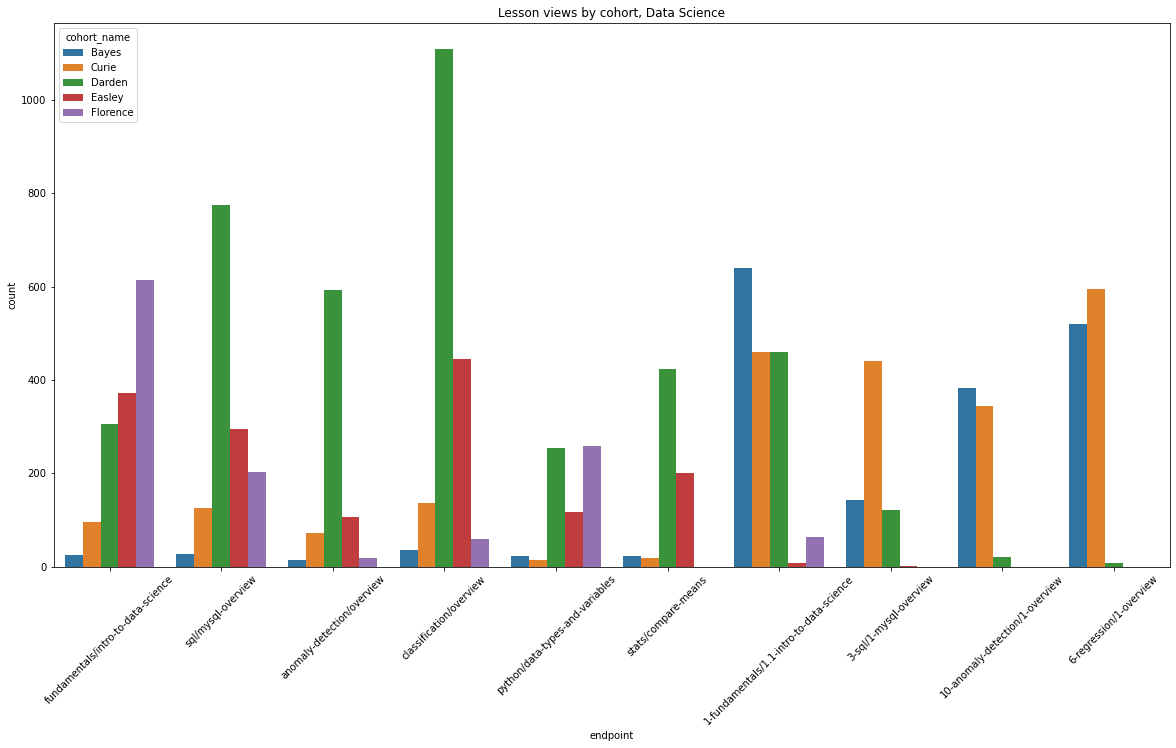

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=ds_graph_set, x='endpoint',hue='cohort_name',hue_order=['Bayes','Curie','Darden','Easley','Florence'])
plt.title('Lesson views by cohort, Data Science')
plt.xticks(rotation=45);

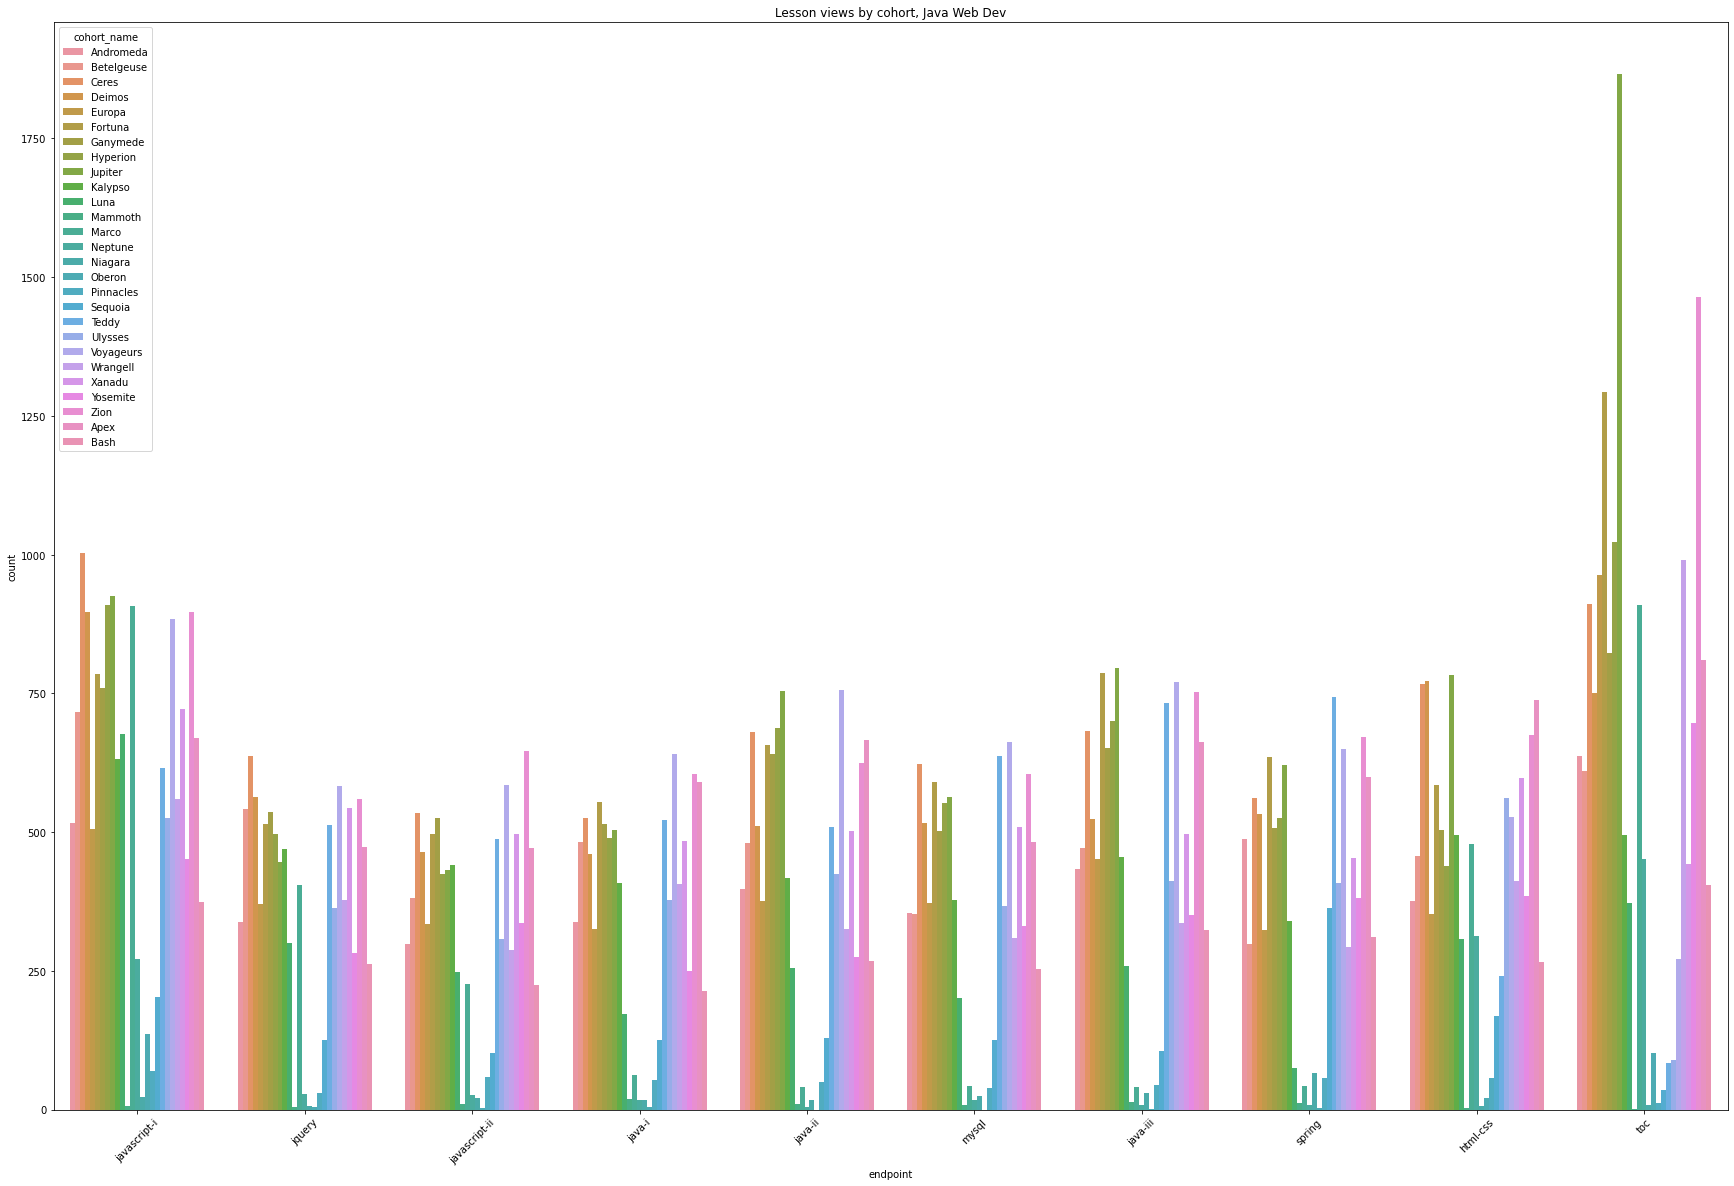

In [19]:
java_wd_df = temp[temp.program == 'java_web_dev']
java_wd_graph_set = java_wd_df[java_wd_df.endpoint.isin(['javascript-i', 'toc', 'java-iii', 'html-css', 'java-ii', 'spring',
       'jquery', 'mysql', 'java-i', 'javascript-ii'])]
java_wd_graph_set = java_wd_graph_set[java_wd_graph_set.cohort_name != 'Staff']
plt.figure(figsize=(30,20))
sns.countplot(data=java_wd_graph_set, x='endpoint',hue='cohort_name', hue_order = ['Andromeda', 'Betelgeuse', 'Ceres', 'Deimos',
       'Europa', 'Fortuna', 'Ganymede', 'Hyperion', 'Jupiter', 'Kalypso',
       'Luna', 'Mammoth', 'Marco', 'Neptune', 'Niagara', 'Oberon',
       'Pinnacles', 'Sequoia', 'Teddy', 'Ulysses', 'Voyageurs',
       'Wrangell', 'Xanadu', 'Yosemite', 'Zion', 'Apex', 'Bash'])
plt.title("Lesson views by cohort, Java Web Dev")
plt.xticks(rotation=45);

---

3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
   


[Brian's approach here]

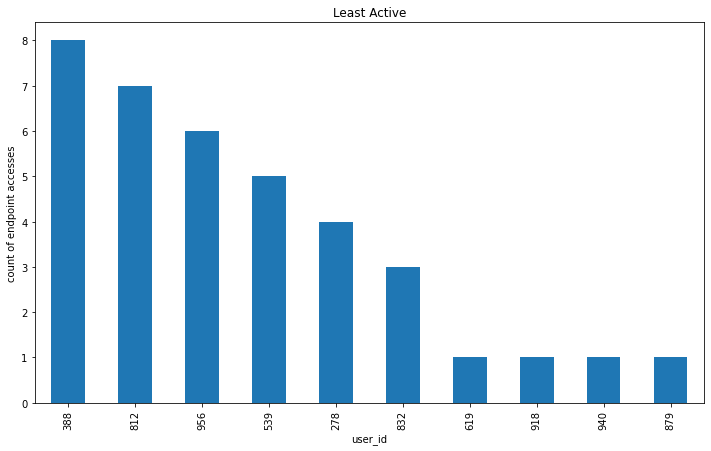

In [20]:
temp['is_active']= temp.date_time <= temp.cohort_end
is_active = temp[temp.is_active == True]
is_active.user_id.value_counts().tail(10).plot.bar(figsize=(12,7))
plt.title('Least Active')
plt.xlabel('user_id')
plt.ylabel('count of endpoint accesses')
plt.show()

The following plots look at total page views by student per week of their program and cohort for data science students: (Unfortunately, the axis labels and titles do not appear to be saving in the graph exports, please see `jag-eplore.ipynb` for the full graphs and code to generate them )

Bayes page views by week by student
![bayes](images/bayes_week.png)
Curie page views by week by student
![curie](images/curie_week.png)
Darden page views by week by student
![darden](images/darden_week.png)
Easley page views by week by student
![easley](images/easley_week.png)
Florence page views by week by student
![florence](images/florence_week.png)

---

4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


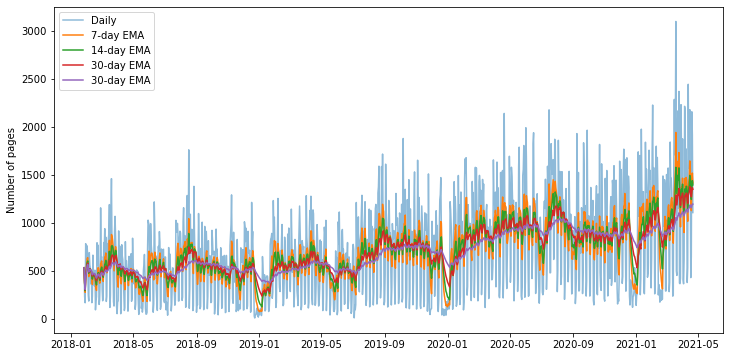

In [21]:
pages = temp['endpoint'].resample('d').count()
ema_7d = pages.ewm(span=7).mean()
ema_14d = pages.ewm(span=14).mean()
ema_30d = pages.ewm(span=30).mean()
ema_90d = pages.ewm(span=90).mean()
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [22]:
def prep(df, user):
    df = df[df.user_id == user]
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]

In [24]:
span = 30
weight = 3.5
not_staff = temp[temp.cohort_name != 'Staff']
anomalies = pd.DataFrame()
for u in list(not_staff.user_id.unique()):
    user_df = find_anomalies(temp, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [25]:
anomalies.sort_values(by='pages',ascending=False).head(10)

,pages,midband,ub,lb,pct_b,user_id
date,,,,,,
2019-03-03,272,24.721632,266.780128,-217.336864,1.010782,341
2018-06-02,198,16.484863,188.766965,-155.797239,1.026796,138
2019-12-19,192,19.601776,187.231096,-148.027544,1.014225,526
2020-10-16,179,20.158062,173.720239,-133.404115,1.017191,658
2020-06-05,165,20.035882,163.037501,-122.965736,1.006862,521
2019-02-14,153,10.082685,143.744930,-123.579560,1.034621,223
2021-03-23,146,26.440411,145.913292,-93.032470,1.000363,581
2019-07-12,129,8.497956,121.171127,-104.175214,1.034742,309
2020-12-07,128,11.280035,121.238945,-98.678875,1.030744,480


In [26]:
anomalies.sort_values(by='pages',ascending=False).head(20).user_id

date
2019-03-03    341
2018-06-02    138
2019-12-19    526
2020-10-16    658
2020-06-05    521
2019-02-14    223
2021-03-23    581
2019-07-12    309
2020-12-07    480
2021-02-02    785
2020-01-14    423
2019-12-20    482
2020-05-26    635
2020-04-21    341
2019-09-15    344
2018-09-10    101
2021-01-20    248
2021-02-01    750
2019-07-08      1
2020-08-03    664
Name: user_id, dtype: int64

---

5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


To answer this question, I took the following steps:

1. Create a separate datafame for content access during or after 2020 filtered to remove any staff members or students from multiple porgrams.
2. Used this post-2019 data to label endpoints as 'webdev' or data science by the `program_id` of the user accessing the curriculum
3. Applied these endpoint labels to the earlier data
4. Plotted same-curriculum and cross-curriculum page views by week across 2019
   
   This generated the following plot:



![Q5 plot](images/question5.png)


Here we can see around week 20 the cross-platform curriculum access was cut off. This appears to have been successful. If we must know if this happened before, we can create similar plots over different time scales to determine that.

---

6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?


---

7. Which lessons are least accessed?

In [27]:
for program in ['java_web_dev','data_science']:
    print(f'{program}')
    print(temp[temp.program == program].groupby(['endpoint']).count().source_ip.sort_values()[:15])
    print('_________________________________')

java_web_dev
endpoint
'                                                                           1
cheatsheet.tex                                                              1
classification/user-defined-functions                                       1
cli-02-listing-files                                                        1
cli-03-file-paths                                                           1
cli-07-more-topics                                                          1
wp-admin                                                                    1
codeupexercises                                                             1
coding-challenges                                                           1
capstones                                                                   1
cohorts/%7Bid%7D/grades.csvhttp://tools.codeup.com/cohorts/26/grades.csv    1
console-io                                                                  1
content/appendix/angular/controllers.html 